In [2]:
import cntk as C
from scipy.misc import imread
from matplotlib import pyplot as plt
import numpy as np
from os.path import join, dirname, exists, isfile
from os import listdir, rmdir, makedirs
import sys
from urllib.request import urlretrieve
import struct
%matplotlib inline

In [18]:
def loadData_train(root):
    print('Loading Training data')
    path_features = join(root, 'Train')
    images = np.zeros(shape=[5708,(200 * 200 * 3) + 1], dtype=np.int32)
    num_images = 0
    for i in range(1,13):
        path = join(path_features,str(i))
        print(path)
        files = listdir(path)
        for count in range(0, len(files)):
            img_path = join(path, files[count])
            img = imread(img_path)
            images[count + num_images,:-1] = img.flatten()
            images[count + num_images, -1] = i
        print('Accessing images with label : {}'.format(str(i)))
        num_images = num_images + len(files)
    return images

In [4]:
# train and test done seperatly to avoid memory error
root = 'Wood_Dataset'
data_train = loadData_train(root)

Loading data
Wood_Dataset/Train/1
Accessing images with label : 1
Wood_Dataset/Train/2
Accessing images with label : 2
Wood_Dataset/Train/3
Accessing images with label : 3
Wood_Dataset/Train/4
Accessing images with label : 4
Wood_Dataset/Train/5
Accessing images with label : 5
Wood_Dataset/Train/6
Accessing images with label : 6
Wood_Dataset/Train/7
Accessing images with label : 7
Wood_Dataset/Train/8
Accessing images with label : 8
Wood_Dataset/Train/9
Accessing images with label : 9
Wood_Dataset/Train/10
Accessing images with label : 10
Wood_Dataset/Train/11
Accessing images with label : 11
Wood_Dataset/Train/12
Accessing images with label : 12


(200, 200, 3)


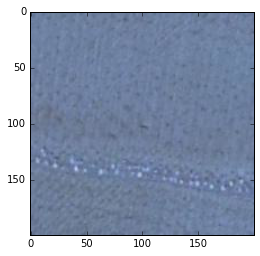

Image Label: 9


In [5]:
sample_num = 4000
data_show = data_train[sample_num,:-1].reshape(200,200,3)
print(data_show.shape)
plt.imshow(data_show)
plt.show()
print("Image Label: {}".format(data_train[sample_num,-1]))

In [14]:
#save data
# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, ndarray):
    dir = dirname(filename)

    if not exists(dir):
        makedirs(dir)
    
    if not isfile(filename):
        print("Saving", filename )
        with open(filename, 'w') as f:
            labels = list(map(' '.join, np.eye(12, dtype=np.uint).astype(str)))
            for row in ndarray:
                row_str = row.astype(str)
                label_str = labels[row[-1] - 1] #needs +1 as index start at 0
                feature_str = ' '.join(row_str[:-1])
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
    else:
        print("File already exists", filename)

In [15]:
data_dir = join('data','wood')
print('Writing train text file...')
savetxt(join(data_dir, 'Train-Wood-Species-cntk.txt'), data_train)


Writing train text file...
Saving data/wood/Train-Wood-Species-cntk.txt


In [46]:
def loadData_test(root):
    print('Loading Test Data')
    path_features = join(root, 'Test')
    files = listdir(path_features)
    images = np.zeros(shape=[len(files),(200 * 200 * 3) + 1], dtype=np.int32)
    for count in range(0, len(files)):
        lbl = (files[count].split('_'))[1].split('.')[0]
        img_path = join(path_features, files[count])
        img = imread(img_path)
        images[count,:-1] = img.flatten()
        images[count , -1] = lbl
    return images

In [47]:
# train and test done seperatly to avoid memory error
data_test = loadData_test(root)

Loading Test Data


In [49]:
# saving test data
print('Writing test text file ...')
savetxt(join(data_dir, 'Test-Wood-Species-cntk.txt'), data_test)

Writing test text file ...
Saving data/wood/Test-Wood-Species-cntk.txt
